# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

import seaborn as sns

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [3]:
cities

['qaanaaq',
 'rikitea',
 'ayan',
 'busselton',
 'mataura',
 'pagudpud',
 'pevek',
 'vila franca do campo',
 'vardo',
 'saldanha',
 'ushuaia',
 'deputatskiy',
 'havre-saint-pierre',
 'bluff',
 'san buenaventura',
 'taolanaro',
 'hobart',
 'cururupu',
 'ilulissat',
 'oistins',
 'khandyga',
 'havelock',
 'nouakchott',
 'iqaluit',
 'te horo',
 'cape town',
 'kapaa',
 'san miguel',
 'chanthaburi',
 'fershampenuaz',
 'umzimvubu',
 'saleaula',
 'samusu',
 'jamestown',
 'thompson',
 'beyneu',
 'puerto ayora',
 'georgetown',
 'punta arenas',
 'vaini',
 'atuona',
 'yellowknife',
 'lovozero',
 'san francisco del mar',
 'carnarvon',
 'demirci',
 'chokurdakh',
 'manaus',
 'ningan',
 'stantsionno-oyashinskiy',
 'illoqqortoormiut',
 'tuatapere',
 'coracao de jesus',
 'barrow',
 'vostok',
 'libertador general san martin',
 'cotonou',
 'maragogi',
 'namibe',
 'byron bay',
 'along',
 'yian',
 'ribeira grande',
 'mayo',
 'marrakesh',
 'arraial do cabo',
 'inirida',
 'cidreira',
 'clyde river',
 'saint ge

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
#req = requests.get(base_url + f'&q={cities[0]}').json()
#req
# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often.

city_weather_dict = {"City":[],
                     'City ID':[],
                     'Country':[],
                     "Latitude": [],
                     'Longitude':[],
                    "Humidity":[],
                    'Temperature (F)':[],
                    'Cloudiness':[],
                    'Wind Speed':[]}

for i in range(len(cities)):
    
    # send http request
    req = requests.get(base_url + f'&q={cities[i]}')
    
    # jsonify data because it's text
    data = req.json()
    
    #I realized after running this, I could have put .json() at the end of
    # my req instead of the extra step
    
    #ignore bad requests
    if data['cod'] == 200: #to ignore bad requests ie other than 200 like 404
        
        #print(i)  debugging statement

        #add values to city_weather_dict
        city_weather_dict["City"].append(data['name'])
        city_weather_dict['City ID'].append(data['id'])
        city_weather_dict['Country'].append(data['sys']['country'])
        city_weather_dict['Latitude'].append(data['coord']['lat'])
        city_weather_dict['Longitude'].append(data['coord']['lon'])
        city_weather_dict["Humidity"].append(data['main']['humidity'])
        city_weather_dict['Temperature (F)'].append(data['main']['temp'])
        city_weather_dict['Cloudiness'].append(data['clouds']['all'])
        city_weather_dict['Wind Speed'].append(data['wind']['speed'])

#print(city_weather_dict) #test code

weather_df = pd.DataFrame.from_dict(city_weather_dict)


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [5]:
#I'm not sure I undertand the to_csv() options
weather_df.to_csv('weather_data.csv') #saves output to file weather_data.csv

In [6]:
print(weather_df.count())  #check # of cities in df
#Out of 613 cities, obtained data on 561
weather_df.head(10) #show first 10 cities data

City               561
City ID            561
Country            561
Latitude           561
Longitude          561
Humidity           561
Temperature (F)    561
Cloudiness         561
Wind Speed         561
dtype: int64


,City,City ID,Country,Latitude,Longitude,Humidity,Temperature (F),Cloudiness,Wind Speed
0,Qaanaaq,3831208,GL,77.4840,-69.3632,70,2.82,69,8.14
1,Rikitea,4030556,PF,-23.1203,-134.9692,61,76.73,1,7.65
2,Ayan,2027316,RU,56.4500,138.1667,92,20.12,100,12.97
3,Busselton,2075265,AU,-33.6500,115.3333,79,58.89,58,1.99
4,Mataura,6201424,NZ,-46.1927,168.8643,96,44.01,59,1.01
5,Pagudpud,1696482,PH,18.5616,120.7868,83,73.71,42,13.06
6,Pevek,2122090,RU,69.7008,170.3133,99,-24.18,100,4.09
7,Vila Franca do Campo,3372472,PT,37.7167,-25.4333,88,60.80,75,19.57
8,Vardø,777019,NO,70.3705,31.1107,80,30.20,20,13.80
9,Saldanha,3361934,ZA,-33.0117,17.9442,77,62.60,40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

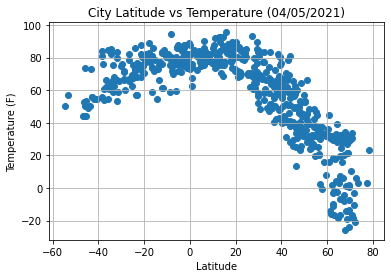

In [7]:
fig1, ax1 = plt.subplots()
ax1.scatter(weather_df['Latitude'], weather_df['Temperature (F)'])
ax1.grid(axis='both')
ax1.set(title = 'City Latitude vs Temperature (04/05/2021)', ylabel = 'Temperature (F)', xlabel='Latitude')
plt.show()

#### Latitude vs. Humidity Plot

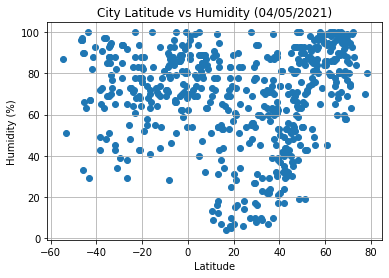

In [8]:
fig2, ax2 = plt.subplots()
ax2.scatter(weather_df['Latitude'], weather_df['Humidity'])
ax2.grid(axis='both')
ax2.set(title = 'City Latitude vs Humidity (04/05/2021)', ylabel = 'Humidity (%)', xlabel='Latitude')
plt.show()

#### Latitude vs. Cloudiness Plot

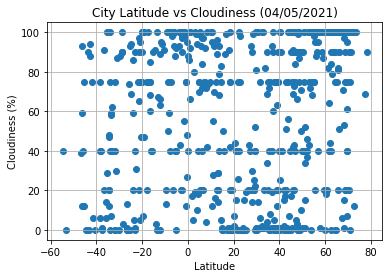

In [9]:
fig3, ax3 = plt.subplots()
ax3.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
ax3.grid(axis='both')
ax3.set(title = 'City Latitude vs Cloudiness (04/05/2021)', ylabel = 'Cloudiness (%)', xlabel='Latitude')
plt.show()


#### Latitude vs. Wind Speed Plot

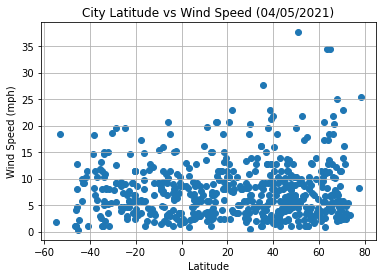

In [10]:
fig4, ax4 = plt.subplots()
ax4.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
ax4.grid(axis='both')
ax4.set(title = 'City Latitude vs Wind Speed (04/05/2021)', ylabel = 'Wind Speed (mph)', xlabel='Latitude')
plt.show()



### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

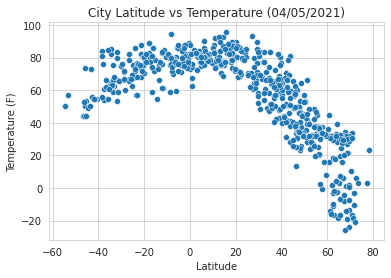

In [11]:
with sns.axes_style("whitegrid"):
    
    sns.scatterplot(x='Latitude', y='Temperature (F)', data=weather_df)

plt.title('City Latitude vs Temperature (04/05/2021)')
plt.show()

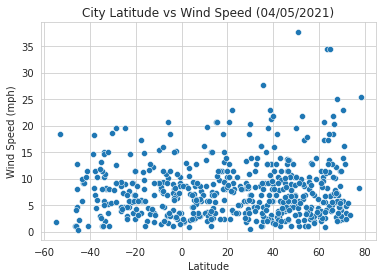

In [12]:
with sns.axes_style("whitegrid"):
    
    sns.scatterplot(x='Latitude', y='Wind Speed', data=weather_df)

plt.title('City Latitude vs Wind Speed (04/05/2021)')
plt.ylabel('Wind Speed (mph)')
plt.show()

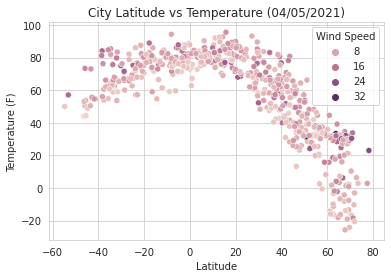

In [13]:
with sns.axes_style("whitegrid"):
    
    sns.scatterplot(x='Latitude', y='Temperature (F)', data=weather_df, hue='Wind Speed')

plt.title('City Latitude vs Temperature (04/05/2021)')
plt.show()

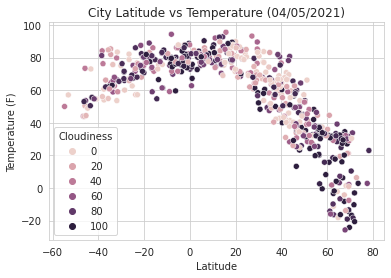

In [14]:
with sns.axes_style("whitegrid"):
    
    sns.scatterplot(x='Latitude', y='Temperature (F)', data=weather_df, hue='Cloudiness')

plt.title('City Latitude vs Temperature (04/05/2021)')
plt.show()

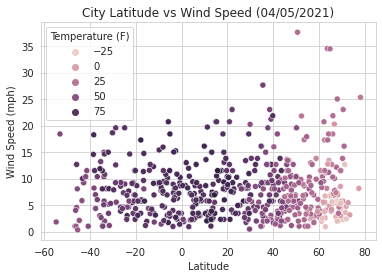

In [15]:
with sns.axes_style("whitegrid"):
    
    sns.scatterplot(x='Latitude', y='Wind Speed', data=weather_df, hue='Temperature (F)')

plt.title('City Latitude vs Wind Speed (04/05/2021)')
plt.ylabel('Wind Speed (mph)')
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

<font color=purple>
    
### Observable Trends:
* Most remarkably, it does get warmer towards the equator.  Between a latitude of -20 to about 30 degrees, we have the most current warm segment of the temperatures taken on a particular day and time.
<br>
    
* The data sugguests most randomly chosen cities lie between -40 and 70 degrees of latitude.  The skew towards the upper half of the hemisphere could be due to more inhabitable land mass in the northern hemisphere.
<br>
* There appears to be no correlation between latitude and wind speed and latitude and cloudiness.  There seems to be no effect on temperature due to cloudiness.  Clouds covered all latitudes and all temperatures.  Varying wind speeds also covered all latitudes.
<br>
* There seems to be a correlation between the driest areas (under 20% humidity) and latitude, but it is not exclusive.   The driest areas are between approximately 10 and 50 degrees latitude.  However, there were no very low humidity areas in the southern hemisphere or above approx 50 degrees latitude.

</font>

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 